<a href="https://colab.research.google.com/github/jihoonin/Face-recognition-/blob/main/02_imdb_wiki_githubcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/imdeepmind/processed-imdb-wiki-dataset.git

https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [ ]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path', 'face_score1', 'face_score2', 'name']

imdb_mat = '/content/drive/MyDrive/data/imdb.mat'
wiki_mat = '/content/drive/MyDrive/data/wiki.mat'

imdb_data = loadmat(imdb_mat)
wiki_data = loadmat(wiki_mat)

del imdb_mat, wiki_mat

imdb = imdb_data['imdb'] # 데이터에 접근하기 위해 인덱싱
wiki = wiki_data['wiki']

imdb_photo_taken = imdb[0][0][1][0] #structure arry:imdb[0][0], second field[1], value in numpy[0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
imdb_name = imdb[0][0][4][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

imdb_path = []
wiki_path = []

for path in imdb_full_path:
    imdb_path.append('imdb_crop/' + path[0]) #경로 앞에 'imdb_crop/'을 붙여줌

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])


imdb_genders = []
wiki_genders = []

for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male') #1은 male로 치환
    elif imdb_gender[n] == 0:
        imdb_genders.append('female')
    else:
        imdb_genders.append(np.nan)

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    elif wiki_gender[n] == 0:
        wiki_genders.append('female')
    else:
        wiki_genders.append(np.nan)

imdb_names = []
for name in imdb_name:
    imdb_names.append(name[0])

# Wiki data does not have celeb_names, fill with NaN or empty string
wiki_names = [np.nan] * len(wiki_gender)

imdb_dob = []
wiki_dob = []

for file in imdb_path:
    try:
        temp = file.split('_')[3]
        temp = temp.split('-')
        if len(temp[1]) == 1:
            temp[1] = '0' + temp[1]
        if len(temp[2]) == 1:
            temp[2] = '0' + temp[2]

        if temp[1] == '00':
            temp[1] = '01'
        if temp[2] == '00':
            temp[2] = '01'

        imdb_dob.append('-'.join(temp))
    except:
        imdb_dob.append(np.nan) # Handle cases where dob cannot be extracted


for file in wiki_path:
    try:
        wiki_dob.append(file.split('_')[2])
    except:
        wiki_dob.append(np.nan) # Handle cases where dob cannot be extracted


imdb_age = []
wiki_age = []

# Calculate age based on the provided formula

for i in range(len(imdb_dob)):
    try:
        # Assuming imdb_dob is in 'YYYY-MM-DD' format
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
        imdb_age.append(diff)
    except Exception as ex:
        # print(ex) # Uncomment to see specific errors
        imdb_age.append(-1) # Assign a default value or skip for invalid dates


for i in range(len(wiki_dob)):
    try:
        # Assuming wiki_dob is a Matlab serial date number
        # Convert Matlab serial date number to datetime
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
        wiki_age.append(diff)
    except Exception as ex:
        # print(ex) # Uncomment to see specific errors
        wiki_age.append(-1) # Assign a default value or skip for invalid dates


final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2, imdb_names)).T
final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2, wiki_names)).T

final_imdb_df = pd.DataFrame(final_imdb)
final_wiki_df = pd.DataFrame(final_wiki)

final_imdb_df.columns = cols
final_wiki_df.columns = cols

meta = pd.concat((final_imdb_df, final_wiki_df))

meta = meta[meta['face_score1'] != '-inf'] #useful data collecting
meta = meta[meta['face_score2'] == 'nan'] #collect face image of one person

meta = meta.drop(['face_score1', 'face_score2'], axis=1) #remove columns

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)


[1968 1970 1968 ... 2011 2011 2011]
[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43')
 array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44')
 array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43') ...
 array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44')
 array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44')
 array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]


In [ ]:
imdb_path[:1]


['imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg']

In [ ]:
wiki_path[:1]


['wiki_crop/17/10000217_1981-05-05_2009.jpg']

In [ ]:
imdb_genders[:8]

['male', 'male', 'male', 'male', 'male', 'female', 'female', 'female']

In [ ]:
imdb_path[:3]

['imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg',
 'imdb_crop/01/nm0000001_rm3343756032_1899-5-10_1970.jpg',
 'imdb_crop/01/nm0000001_rm577153792_1899-5-10_1968.jpg']

In [ ]:
wiki_path[:3]

['wiki_crop/17/10000217_1981-05-05_2009.jpg',
 'wiki_crop/48/10000548_1925-04-04_1964.jpg',
 'wiki_crop/12/100012_1948-07-03_2008.jpg']

In [ ]:
imdb_photo_taken[:10]


array([1968, 1970, 1968, 1968, 1968, 1991, 2004, 2004, 1991, 2004],
      dtype=uint16)

In [ ]:
imdb_age = []
wiki_age = []

# Calculate age based on the provided formula
i==1
#for i in range(len(imdb_dob)):
try:
        # Assuming imdb_dob is in 'YYYY-MM-DD' format
    d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
    d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
    rdelta = relativedelta(d2, d1)
    diff = rdelta.years
    imdb_age.append(diff)
except Exception as ex:
        # print(ex) # Uncomment to see specific errors
    imdb_age.append(-1) # Assign a default value or skip for invalid dates


In [ ]:
imdb_dob[i][0:10]

'1989-12-29'

In [ ]:
d1

datetime.datetime(1989, 12, 29, 0, 0)

In [ ]:
str(imdb_photo_taken[i])

'2011'

In [ ]:
d2

datetime.datetime(2011, 1, 1, 0, 0)

In [ ]:
rdelta

relativedelta(years=+21, days=+3)

In [ ]:
diff

21

In [ ]:
final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2, imdb_names)).T
final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2, wiki_names))

In [ ]:
final_imdb

array([['68', 'male',
        'imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg',
        '1.4596929136202572', '1.1189733571573068', 'Fred Astaire'],
       ['70', 'male',
        'imdb_crop/01/nm0000001_rm3343756032_1899-5-10_1970.jpg',
        '2.5431975987694435', '1.852007728341101', 'Fred Astaire'],
       ['68', 'male',
        'imdb_crop/01/nm0000001_rm577153792_1899-5-10_1968.jpg',
        '3.455579487909806', '2.9856602160994425', 'Fred Astaire'],
       ...,
       ['21', 'female',
        'imdb_crop/08/nm3994408_rm926592512_1989-12-29_2011.jpg', '-inf',
        'nan', 'Jane Levy'],
       ['21', 'female',
        'imdb_crop/08/nm3994408_rm943369728_1989-12-29_2011.jpg',
        '4.450724521156153', 'nan', 'Jane Levy'],
       ['21', 'female',
        'imdb_crop/08/nm3994408_rm976924160_1989-12-29_2011.jpg',
        '2.133502692323489', 'nan', 'Jane Levy']], dtype='<U55')

In [ ]:
final_imdb_df.columns = cols
final_imdb_df.columns


Index(['age', 'gender', 'path', 'face_score1', 'face_score2', 'name'], dtype='object')

In [ ]:
final_imdb_df


,age,gender,path,face_score1,face_score2,name
0,68,male,imdb_crop/01/nm0000001_rm124825600_1899-5-10_1...,1.4596929136202572,1.1189733571573068,Fred Astaire
1,70,male,imdb_crop/01/nm0000001_rm3343756032_1899-5-10_...,2.5431975987694435,1.852007728341101,Fred Astaire
2,68,male,imdb_crop/01/nm0000001_rm577153792_1899-5-10_1...,3.455579487909806,2.9856602160994425,Fred Astaire
3,68,male,imdb_crop/01/nm0000001_rm946909184_1899-5-10_1...,1.872117169344902,nan,Fred Astaire
4,68,male,imdb_crop/01/nm0000001_rm980463616_1899-5-10_1...,1.1587657871914132,nan,Fred Astaire
...,...,...,...,...,...,...
460718,21,female,imdb_crop/08/nm3994408_rm761245696_1989-12-29_...,3.845884250530567,nan,Jane Levy
460719,21,female,imdb_crop/08/nm3994408_rm784182528_1989-12-29_...,-inf,nan,Jane Levy
460720,21,female,imdb_crop/08/nm3994408_rm926592512_1989-12-29_...,-inf,nan,Jane Levy
460721,21,female,imdb_crop/08/nm3994408_rm943369728_1989-12-29_...,4.450724521156153,nan,Jane Levy


In [ ]:
print("Contents of meta DataFrame:")
display(meta)

Contents of meta DataFrame:


,age,gender,path,name
31876,20,male,wiki_crop/42/5059042_1986-03-17_2007.jpg,nan
109956,38,male,imdb_crop/26/nm0001426_rm3676080896_1943-12-31...,Ben Kingsley
304346,39,male,imdb_crop/25/nm0147825_rm1206033152_1964-4-24_...,Cedric the Entertainer
131864,42,female,imdb_crop/53/nm0001853_rm3889465344_1963-3-18_...,Vanessa Williams
23594,20,male,wiki_crop/38/473338_1926-10-13_1947.jpg,nan
...,...,...,...,...
396380,29,male,imdb_crop/38/nm1379938_rm323848704_1979-7-15_2...,Travis Fimmel
460575,22,female,imdb_crop/21/nm2998321_rm1542970368_1990-6-5_2...,Sophie Lowe
33936,31,male,wiki_crop/73/5353873_1980-09-07_2012.jpg,nan
26425,23,male,wiki_crop/70/12480870_1988-11-20_2012.jpg,nan


In [ ]:
meta

,age,gender,path,name
113696,45,female,imdb_crop/73/nm0001473_rm66748672_1964-2-5_201...,Laura Linney
378792,37,male,imdb_crop/82/nm1668582_rm3532633856_1972-1-8_2...,Michael Mercurio
42952,44,male,imdb_crop/85/nm0000285_rm351116032_1958-4-3_20...,Alec Baldwin
187797,59,male,imdb_crop/57/nm0205657_rm341809152_1938-1-13_1...,William B. Davis
147717,32,female,imdb_crop/62/nm0004862_rm4269185792_1965-2-23_...,Kristin Davis
...,...,...,...,...
147474,50,male,imdb_crop/57/nm0004857_rm1246336000_1956-3-1_2...,Tim Daly
50954,39,male,imdb_crop/69/nm0000369_rm3807681280_1964-2-18_...,Matt Dillon
383718,40,male,imdb_crop/47/nm0071847_rm244034560_1969-10-10_...,Manu Bennett
9086,33,male,wiki_crop/98/2416898_1980-05-27_2014.jpg,nan


In [ ]:
# Analyze the distribution of celebrity names
top_names = meta['name'].value_counts().nlargest(20)
print("Top 20 Celebrity Names:")
display(top_names)

Top 20 Celebrity Names:


,count
name,
nan,40216
Angelina Jolie,395
Brad Pitt,324
Jennifer Aniston,323
Nicole Kidman,295
Charlize Theron,285
Zooey Deschanel,279
Tom Cruise,279
Leighton Meester,278


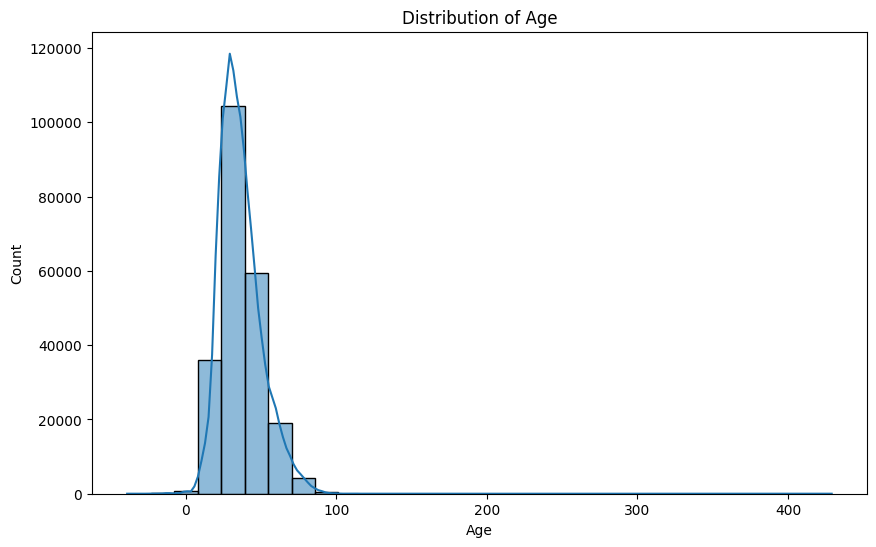

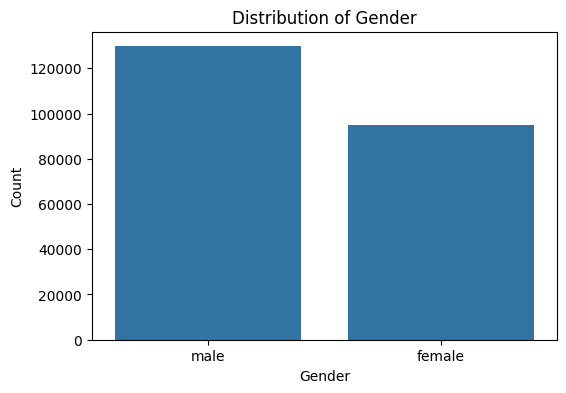

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert age to numeric, coercing errors to NaN
meta['age'] = pd.to_numeric(meta['age'], errors='coerce')

# Drop rows where age is NaN (due to coercion or initial -1)
meta.dropna(subset=['age'], inplace=True)

# Convert age to integer type
meta['age'] = meta['age'].astype(int)


# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=meta, x='age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=meta, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3684616516.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.index, y=top_names.values, palette='viridis')


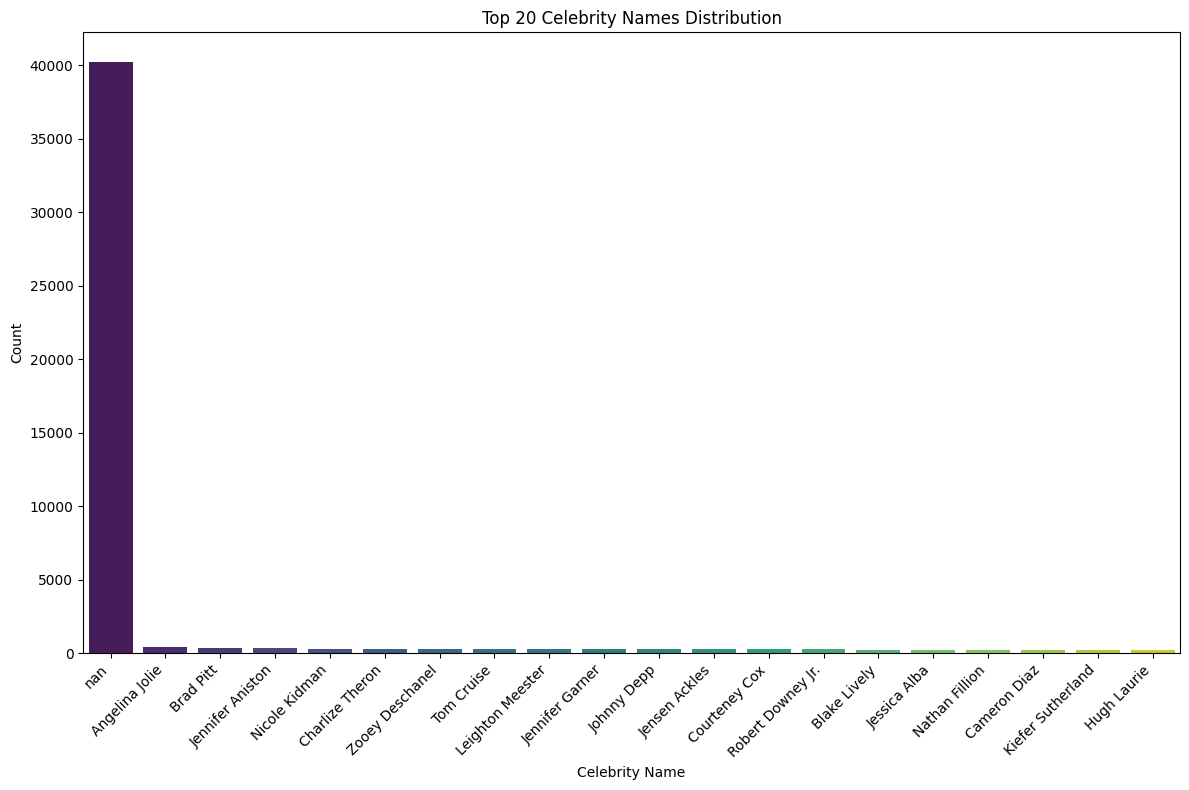

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of celebrity names
top_names = meta['name'].value_counts().nlargest(20)

# Visualize the distribution of top 20 celebrity names
plt.figure(figsize=(12, 8))
sns.barplot(x=top_names.index, y=top_names.values, palette='viridis')
plt.title('Top 20 Celebrity Names Distribution')
plt.xlabel('Celebrity Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Display 15 random images and their metadata from the file "meta.csv" located in the directory "/content/drive/MyDrive/data/".

## 데이터 샘플링

### Subtask:
`meta` 데이터프레임에서 무작위로 15개의 행을 선택합니다.


**Reasoning**:
Randomly sample 15 rows from the `meta` DataFrame for further analysis.



In [ ]:
sampled_meta = meta.sample(n=15, random_state=42)

## 이미지 경로 준비

### Subtask:
선택된 각 행에 대한 전체 이미지 파일 경로를 구성합니다. 이미지 파일은 `/content/drive/MyDrive/data/` 디렉토리에 있다고 가정합니다.


**Reasoning**:
Construct the full image file paths by prepending the data directory path to the image paths in the 'path' column of the sampled_meta DataFrame.



In [ ]:
image_paths = []
data_directory = '/content/drive/MyDrive/data/'

for path in sampled_meta['path']:
    full_path = data_directory + path
    image_paths.append(full_path)

print("Constructed image paths:")
for i, path in enumerate(image_paths):
    print(f"{i+1}: {path}")

Constructed image paths:
1: /content/drive/MyDrive/data/wiki_crop/15/3032215_1966-07-30_2012.jpg
2: /content/drive/MyDrive/data/imdb_crop/97/nm1885797_rm1870968832_1978-2-10_2011.jpg
3: /content/drive/MyDrive/data/imdb_crop/85/nm0001885_rm21346304_1956-4-30_2011.jpg
4: /content/drive/MyDrive/data/imdb_crop/73/nm1570873_rm2124537344_1963-10-30_2013.jpg
5: /content/drive/MyDrive/data/imdb_crop/64/nm0001264_rm3096746496_1977-4-14_1997.jpg
6: /content/drive/MyDrive/data/imdb_crop/51/nm0000151_rm3429469440_1937-6-1_2002.jpg
7: /content/drive/MyDrive/data/imdb_crop/73/nm0005273_rm764203008_1972-6-28_2013.jpg
8: /content/drive/MyDrive/data/imdb_crop/73/nm0000173_rm328971520_1967-6-20_2012.jpg
9: /content/drive/MyDrive/data/imdb_crop/85/nm0607185_rm3233126656_1979-4-12_2003.jpg
10: /content/drive/MyDrive/data/imdb_crop/13/nm1442113_rm319915520_1973-5-27_2006.jpg
11: /content/drive/MyDrive/data/imdb_crop/15/nm0000115_rm211860480_1964-1-7_2011.jpg
12: /content/drive/MyDrive/data/imdb_crop/32/nm0

## 이미지 및 메타 데이터 표시

### Subtask:
선택된 각 이미지와 해당 메타 데이터(연령, 성별, 이름 등)를 표시합니다. 이미지를 표시하기 위해 `IPython.display`의 `Image` 또는 `display` 함수를 사용할 수 있습니다.


In [ ]:
from IPython.display import Image, display

print("Displaying sampled images and metadata:")
for i, (index, row) in enumerate(sampled_meta.iterrows()):
    image_path = image_paths[i] # Use the enumerate index to get the corresponding image path
    print(f"Metadata for image {i+1}:")
    print(f"  Age: {row['age']}")
    print(f"  Gender: {row['gender']}")
    print(f"  Name: {row['name']}")
    print(f"  Path: {row['path']}")
    try:
        display(Image(filename=image_path))
    except FileNotFoundError:
        print(f"Image file not found at: {image_path}")
    print("-" * 20)

Displaying sampled images and metadata:
Metadata for image 1:
  Age: -1
  Gender: male
  Name: nan
  Path: wiki_crop/15/3032215_1966-07-30_2012.jpg
Image file not found at: /content/drive/MyDrive/data/wiki_crop/15/3032215_1966-07-30_2012.jpg
--------------------
Metadata for image 2:
  Age: 33
  Gender: male
  Name: Don Omar
  Path: imdb_crop/97/nm1885797_rm1870968832_1978-2-10_2011.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/97/nm1885797_rm1870968832_1978-2-10_2011.jpg
--------------------
Metadata for image 3:
  Age: 55
  Gender: male
  Name: Lars von Trier
  Path: imdb_crop/85/nm0001885_rm21346304_1956-4-30_2011.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/85/nm0001885_rm21346304_1956-4-30_2011.jpg
--------------------
Metadata for image 4:
  Age: 49
  Gender: male
  Name: Mem Ferda
  Path: imdb_crop/73/nm1570873_rm2124537344_1963-10-30_2013.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/73/nm1570873_rm2124537344_1963-

## 이미지 및 메타 데이터 표시 retry 1

### Subtask:
Retry displaying the selected images and their metadata, addressing the `FileNotFoundError` by checking the existence of image files before attempting to display them.


In [ ]:
from IPython.display import Image, display
import os

print("Displaying sampled images and metadata (Retry):")
for i, (index, row) in enumerate(sampled_meta.iterrows()):
    image_path = image_paths[i]
    print(f"Metadata for image {i+1}:")
    print(f"  Age: {row['age']}")
    print(f"  Gender: {row['gender']}")
    print(f"  Name: {row['name']}")
    print(f"  Path: {row['path']}")

    if os.path.exists(image_path):
        try:
            display(Image(filename=image_path))
        except Exception as e:
            print(f"Error displaying image {image_path}: {e}")
    else:
        print(f"Image file not found at: {image_path}")

    print("-" * 20)

Displaying sampled images and metadata (Retry):
Metadata for image 1:
  Age: -1
  Gender: male
  Name: nan
  Path: wiki_crop/15/3032215_1966-07-30_2012.jpg
Image file not found at: /content/drive/MyDrive/data/wiki_crop/15/3032215_1966-07-30_2012.jpg
--------------------
Metadata for image 2:
  Age: 33
  Gender: male
  Name: Don Omar
  Path: imdb_crop/97/nm1885797_rm1870968832_1978-2-10_2011.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/97/nm1885797_rm1870968832_1978-2-10_2011.jpg
--------------------
Metadata for image 3:
  Age: 55
  Gender: male
  Name: Lars von Trier
  Path: imdb_crop/85/nm0001885_rm21346304_1956-4-30_2011.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/85/nm0001885_rm21346304_1956-4-30_2011.jpg
--------------------
Metadata for image 4:
  Age: 49
  Gender: male
  Name: Mem Ferda
  Path: imdb_crop/73/nm1570873_rm2124537344_1963-10-30_2013.jpg
Image file not found at: /content/drive/MyDrive/data/imdb_crop/73/nm1570873_rm21245373

## Summary:

### Data Analysis Key Findings

*   The image files associated with the sampled metadata were not found at the specified paths within the `/content/drive/MyDrive/data/` directory.
*   All attempts to display the sampled images resulted in a `FileNotFoundError`.
*   The code successfully handled the `FileNotFoundError` by checking for file existence using `os.path.exists()` before attempting to display the image.

### Insights or Next Steps

*   Verify the location of the image files or update the image paths in the metadata to the correct directory.
*   If the images are not available, consider performing analysis solely on the metadata or obtaining the necessary image data.
